In [1]:
# Importing required libraries
import pandas
import requests
import numpy 
from bs4 import BeautifulSoup
import smtplib
import time
import datetime

In [2]:
# Connecting to the website (Amazon)

URL_to_Connect="https://www.amazon.in/OnePlus-Nord-Sierra-128GB-Storage/dp/B097RDVDL2/ref=sr_1_4?crid=2BYYLF03SJ8US&keywords=oneplus&qid=1636304756&sprefix=oneplus%2Caps%2C236&sr=8-4"
heads={"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36","Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9", "Accept-Encoding": "gzip, deflate, br","DNT":"1","Connection":"close","Upgrade-Insecure-Requests": "1"}

page=requests.get(URL_to_Connect,headers=heads)
Soup1=BeautifulSoup(page.content,"html.parser")

In [3]:
# Soup1

In [4]:
# Using Prettify function
Soup2=BeautifulSoup(Soup1.prettify(),"html.parser")

In [5]:
# Soup2

In [6]:
# Searching for the particular tags using it's ID from the page and extracting the text from the element
product_title = Soup2.find(id="productTitle").get_text()
print(product_title)


     OnePlus Nord 2 5G (Gray Sierra, 8GB RAM, 128GB Storage)
    


In [7]:
product_price = Soup2.find(id="priceblock_ourprice").get_text()
print(product_price)


        ₹29,999.00
       


In [8]:
# Removing Extra White Spacing
product_title=product_title.strip()
product_price=product_price.strip()

In [9]:
today=datetime.date.today()
print(today)

2021-11-09


In [10]:
# We will save the data that is scraped in a csv file for further use. This can be used for creating a time series dataset, specially if we keep recording the prices of the product over a long period of time, for eg: 2 Years 
import csv
cols_names=["Title","Price","Date"]
data=[product_title,product_price,today]

with open("Amazon_Scraped_Data.csv","w",newline="",encoding="UTF-8") as f:
    writer1=csv.writer(f)
    writer1.writerow(cols_names)
    writer1.writerow(data)

In [11]:
# Saving content in csv file
import pandas as pd
S=pd.read_csv("Amazon_Scraped_Data.csv")
S

,Title,Price,Date
0,"OnePlus Nord 2 5G (Gray Sierra, 8GB RAM, 128GB...","₹29,999.00",2021-11-09


##### We will try to form a dataset of different mobile devices available on Amazon

In [12]:
# Importing Regex
import re

# Function to get data and store the same from page. 

#The function below will scrape data from Amazon Search (We searched mobile on Amazon) and store it in a csv file 
def get_url_html_data(URL_to_Connect,heads):
    page=requests.get(URL_to_Connect,headers=heads)
    Soup1=BeautifulSoup(page.content,"html.parser")
    Soup2=BeautifulSoup(Soup1.prettify(),"html.parser")
    data1=Soup2.find_all("span",class_="a-size-medium a-color-base a-text-normal")
    data2=Soup2.find_all("span",class_="a-price-whole")
#     print(len(data1),len(data2))
    for i in range(min(len(data1),len(data2))):
        r = re.compile("(.*?)\s*\((.*?)\)")
        match=r.match(data1[i].get_text().strip())
        if (match != None):
            S=match.group(2).split(",")
            data_temp=[]
            data_temp.append(match.group(1))
#             print(S[0])
            if ("GB" not in S[0] and "Inch" not in S[0]):
                data_temp.append(S[0])
                Q1=[]
                for q in S:
                    q=q.strip()
                    if ("GB" in q):
                        Q1.append(q)
#                 print(Q1)
                if (len(Q1)==2):
                    data_temp.append(Q1[0])
                    data_temp.append(Q1[1])
                    data_temp.append(data2[i].get_text().strip())
                    with open("Amazon_Scraped_Data_Mobile_DB.csv","a+",newline="",encoding="UTF-8") as f:
                        writer1=csv.writer(f)
                        writer1.writerow(data_temp)
        else:
            continue
    return Soup2


# The below function is used for returning the link to the next page of results, if exists
def go_to_next_page(Soup):
    page=Soup.find("ul",{"class":"a-pagination"})
    if not page.find("li",{"class":"a-disabled a-last"}):
        url="https://www.amazon.in/"+str(page.find("li", {"class":"a-last"}).find("a")["href"])
        return url
    else:
        return 
    Soup1=BeautifulSoup(page.content,"html.parser")
    Soup2=BeautifulSoup(Soup1.prettify(),"html.parser")
    return Soup2


#URL of the first page
URL_to_Connect="https://www.amazon.in/s?k=Mobiles&crid=1GWPX6LVRKEV7&sprefix=mobiles%2Caps%2C337&ref=nb_sb_noss_2"
heads={"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36","Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9", "Accept-Encoding": "gzip, deflate, br","DNT":"1","Connection":"close","Upgrade-Insecure-Requests": "1"}

import csv
# Column names of the data, we want to store in the CSV File
cols_names=["Device Name","Color","RAM Memory","Storage Memory","Price (INR)"]


with open("Amazon_Scraped_Data_Mobile_DB.csv","w",newline="",encoding="UTF-8") as f:
    writer1=csv.writer(f)
    writer1.writerow(cols_names)
    
while True:
    HTML_Current=get_url_html_data(URL_to_Connect,heads)
    Link_Next=go_to_next_page(HTML_Current)
    if Link_Next==None:
        break
    URL_to_Connect=Link_Next

In [49]:
Df_data = pd.read_csv("Amazon_Scraped_Data_Mobile_DB.csv")
df=pd.DataFrame(Df_data)
df

,Device Name,Color,RAM Memory,Storage Memory,Price (INR)
0,OPPO F19 Pro+ 5G,Space Silver,8GB RAM,128GB Storage,"25,990"
1,I KALL K200 4G Smartphone,Blue,2GB,16GB,"4,299"
2,Samsung Galaxy M32,Light Blue,6GB RAM,128GB Storage,"16,999"
3,Samsung Galaxy M32 5G,Slate Black,6GB RAM,128GB Storage,"20,999"
4,OPPO A74 5G,Fantastic Purple,6GB RAM,128GB Storage,"17,990"
...,...,...,...,...,...
220,Vivo V21 5G,Dusk Blue,8GB RAM,256GB Storage,"4,299"
221,Redmi 8A Dual,Sea Blue,2GB RAM,32GB Storage,"4,199"
222,I KALL K5 Smartphon,Blue,2GB,16GB,"5,399"
223,OPPO F19 Pro,Crystal Silver,8GB RAM,256GB Storage,"25,990"


In [50]:
df.describe()

,Device Name,Color,RAM Memory,Storage Memory,Price (INR)
count,225,225,225,225,225
unique,84,100,11,12,89
top,I KALL K5 Smartphon,Blue,4GB RAM,128GB Storage,"25,990"
freq,22,45,54,91,18


In [51]:
df.isnull().any()

Device Name       False
Color             False
RAM Memory        False
Storage Memory    False
Price (INR)       False
dtype: bool

In [52]:
# Extracting the different brands that are sold on Amazon through the device names Device Name
Brand=[]
Brands_Cols=[]
for i in range(len(df["Device Name"])):
    br=df["Device Name"].iloc[i].split(" ")
    if (len(br[0])<2):
        br_name = str(br[0])+" "+str(br[1])
        br_name = br_name.upper()
        Brands_Cols.append(br_name)
        if (br_name.upper() not in Brand):
            Brand.append(br_name)
    else:
        Brands_Cols.append(br[0].upper())
        if br[0].upper() not in Brand:
            Brand.append(br[0].upper())

In [53]:
df = df.assign(Brands = Brands_Cols)
df = df[["Device Name","Brands","Color","RAM Memory","Storage Memory","Price (INR)"]]
df

,Device Name,Brands,Color,RAM Memory,Storage Memory,Price (INR)
0,OPPO F19 Pro+ 5G,OPPO,Space Silver,8GB RAM,128GB Storage,"25,990"
1,I KALL K200 4G Smartphone,I KALL,Blue,2GB,16GB,"4,299"
2,Samsung Galaxy M32,SAMSUNG,Light Blue,6GB RAM,128GB Storage,"16,999"
3,Samsung Galaxy M32 5G,SAMSUNG,Slate Black,6GB RAM,128GB Storage,"20,999"
4,OPPO A74 5G,OPPO,Fantastic Purple,6GB RAM,128GB Storage,"17,990"
...,...,...,...,...,...,...
220,Vivo V21 5G,VIVO,Dusk Blue,8GB RAM,256GB Storage,"4,299"
221,Redmi 8A Dual,REDMI,Sea Blue,2GB RAM,32GB Storage,"4,199"
222,I KALL K5 Smartphon,I KALL,Blue,2GB,16GB,"5,399"
223,OPPO F19 Pro,OPPO,Crystal Silver,8GB RAM,256GB Storage,"25,990"


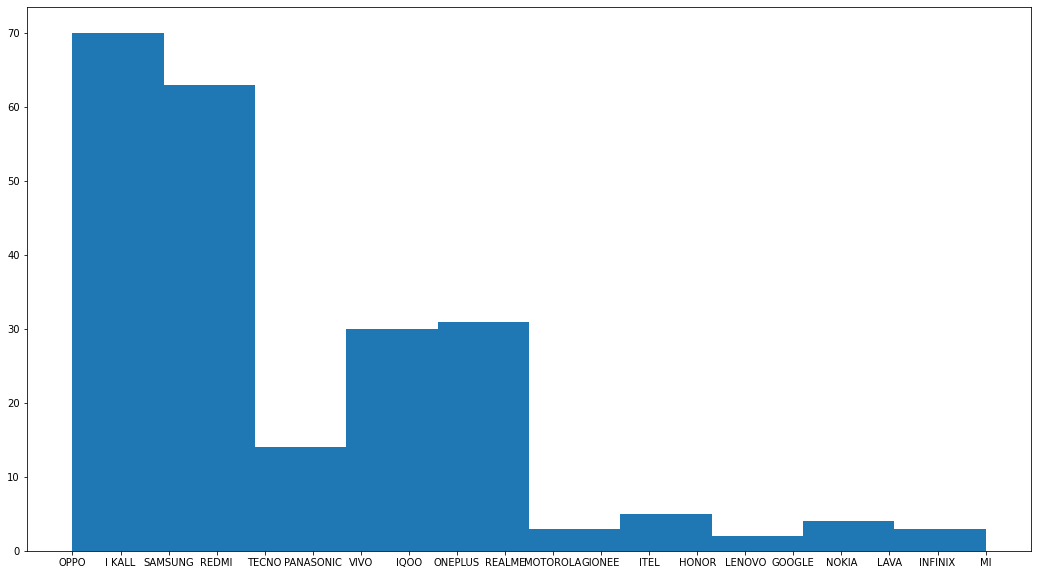

In [19]:
import matplotlib.pyplot as plt

# Figure Size
fig = plt.figure(figsize =(18, 10))
 
# Horizontal Bar Plot
plt.hist(df["Brands"])

# Show Plot
plt.show()

[32, 38, 34, 29, 13, 1, 22, 8, 9, 22, 2, 1, 4, 1, 1, 1, 2, 2, 2, 1]


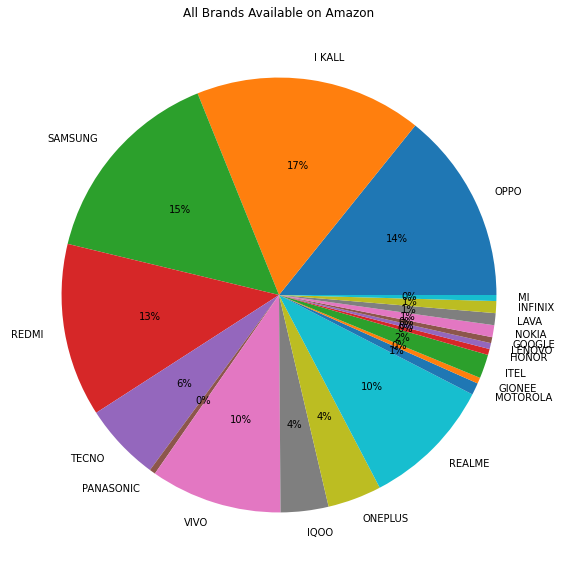

In [20]:
vals = []
for i in range(len(Brand)):
    vals.append(len(df[df["Brands"]==Brand[i]]))
print(vals)    
fig = plt.figure(figsize =(25, 10))
plt.pie(vals,labels=Brand,autopct='%.0f%%')  
plt.title('All Brands Available on Amazon')
plt.show()

In [63]:
# Comparing the average prices of Oppo, Redmi, Realme and Vivo
import numpy as np

for i in range(len(df["Price (INR)"])):
    df["Price (INR)"].iloc[i]=df["Price (INR)"].iloc[i].replace(",","")
    
df1=df[df["Brands"]=="OPPO"]
Op=np.mean(df1["Price (INR)"].astype(float))

df2=df[df["Brands"]=="REDMI"]
Red=np.mean(df2["Price (INR)"].astype(float))

df3=df[df["Brands"]=="VIVO"]
Vi=np.mean(df3["Price (INR)"].astype(float))

df4=df[df["Brands"]=="REALME"]
Rel=np.mean(df4["Price (INR)"].astype(float))


df5=pd.DataFrame()

Text(0, 0.5, 'Average Price')

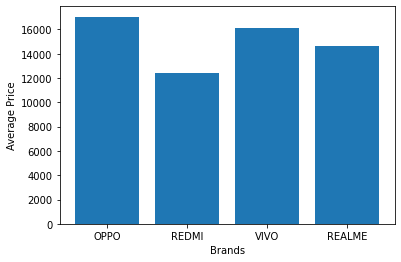

In [64]:
plt.bar(["OPPO","REDMI","VIVO","REALME"],[Op, Red, Vi, Rel])
plt.xlabel("Brands")
plt.ylabel("Average Price")

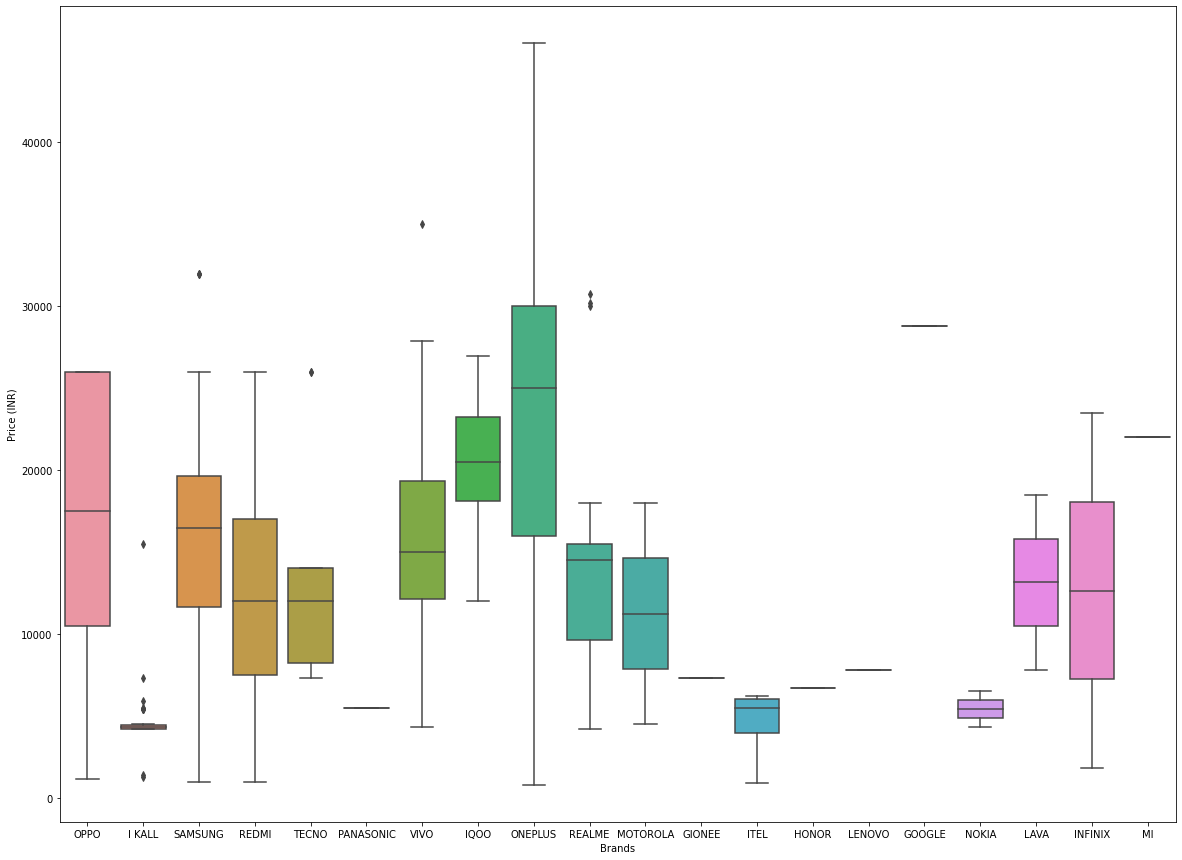

In [89]:
# Drawing Boxplots for comparing the brands
import seaborn as sns
plt.figure(figsize=(20,15))
sns.boxplot(y=df["Price (INR)"].astype(float), x=df['Brands'])

### Through the Boxplots, we can actually analyse the variance in the prices of mobiles provided by all the brands. 
##### We can see that brands like Ikal, Pansonic, iTel, Nokia, Gionee, Honor can be suggested to people with a budget of <=10K
##### People having a slightly higher budget (around <=20K) can loog for mobiles of Oppo, Samsung, Vivo, Redmi, RealMe, Infinix, etc.
##### OnePlus, Google are some of the companies that are making some premier phones sold at a rate greater than 25K, while some brands do have some phones in that segment too.

Text(0, 0.5, 'Number of different Mobiles')

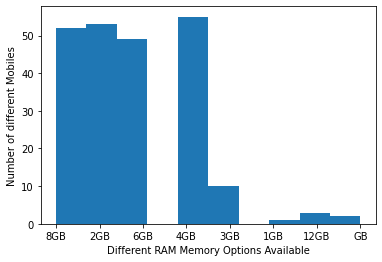

In [44]:
# Analysing the memory sizes preferred in the Indian market:


# We need to standardize the Format of Memory.

RAM_Real=[]
Stor_Real=[]
for i in range(len(df["RAM Memory"])):
    for j in df["RAM Memory"].iloc[i].split(" "):
        if ("GB" in j):
            RAM_Real.append(j)
            
    for j in df["Storage Memory"].iloc[i].split(" "):
        if ("GB" in j):
            Stor_Real.append(j)

# Analyzing the Memory Preferences;
plt.hist(RAM_Real)
plt.xlabel("Different RAM Memory Options Available")
plt.ylabel("Number of different Mobiles")

Text(0, 0.5, 'Number of different Mobiles')

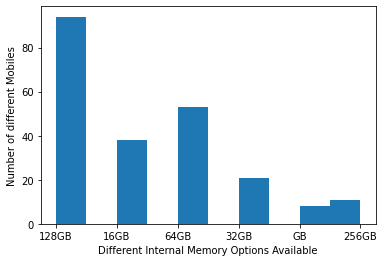

In [45]:
plt.hist(Stor_Real)
plt.xlabel("Different Internal Memory Options Available")
plt.ylabel("Number of different Mobiles")

###### One can easily say that most users prefer Internal Storage of 128Gb or 64GB and 2GB to 8GB RAM, depending upon their usage

In [25]:
# Creating a Standardized DataFrame for Anayzing Samsung Products;

df_Norm = df[["Device Name","Brands","Color","Price (INR)"]]

In [26]:
df = df.assign(Brands = Brands_Cols)
df_Norm=df_Norm.assign(RAM_Memory=RAM_Real)
df_Norm=df_Norm.assign(Internal_Memory=Stor_Real)
df_Norm

,Device Name,Brands,Color,Price (INR),RAM_Memory,Internal_Memory
0,OPPO F19 Pro+ 5G,OPPO,Space Silver,25990,8GB,128GB
1,I KALL K200 4G Smartphone,I KALL,Blue,4299,2GB,16GB
2,Samsung Galaxy M32,SAMSUNG,Light Blue,16999,6GB,128GB
3,Samsung Galaxy M32 5G,SAMSUNG,Slate Black,20999,6GB,128GB
4,OPPO A74 5G,OPPO,Fantastic Purple,17990,6GB,128GB
...,...,...,...,...,...,...
220,Vivo V21 5G,VIVO,Dusk Blue,4299,8GB,256GB
221,Redmi 8A Dual,REDMI,Sea Blue,4199,2GB,32GB
222,I KALL K5 Smartphon,I KALL,Blue,5399,2GB,16GB
223,OPPO F19 Pro,OPPO,Crystal Silver,25990,8GB,256GB


In [27]:
# For analyzing the Different Mobiles provided by Samsung, we can do the following:

df_Sam=df_Norm[df_Norm["Brands"]=="SAMSUNG"]

In [28]:
RAM_Sam=df_Sam["RAM_Memory"].unique()

In [29]:
Int_Sam=df_Sam["Internal_Memory"].unique()

In [30]:
# Finding Global Average of Mobiles with Different GBs of RAM and Internal Memory (M x N Architecture)
Mem_Storer=[]
value_storer_ovr=[]
value_storer_sam=[]
for i in range(len(RAM_Sam)):
    Total1=df_Norm[df_Norm["RAM_Memory"]==RAM_Sam[i]]
    Sam1=df_Sam[df_Sam["RAM_Memory"]==RAM_Sam[i]]
    for j in range(len(Int_Sam)):
        mean_val_total=np.mean(Total1[Total1["Internal_Memory"]==Int_Sam[j]]["Price (INR)"].astype(float))
        mean_val_sam=np.mean(Sam1[Sam1["Internal_Memory"]==Int_Sam[j]]["Price (INR)"].astype(float))
        Mem_Storer.append([RAM_Sam[i],Int_Sam[j]])
        value_storer_ovr.append(mean_val_total)
        value_storer_sam.append(mean_val_sam)

In [34]:
print(Mem_Storer)# Different types of Memory combinations
print(value_storer_ovr) # Global Average of each Memory Combination
print(value_storer_sam) # Samsung Average of each Memory Combination

[['6GB', '128GB'], ['6GB', '64GB'], ['4GB', '128GB'], ['4GB', '64GB'], ['4GB', '32GB'], ['8GB', '128GB'], ['2GB', '128GB']]
[15853.377777777778, 8372.0, 12919.4, 12889.673469387755, 5879.0, 20925.704545454544, nan]
[16408.41176470588, 15990.0, nan, 14434.25, nan, 20926.285714285714, nan]


In [35]:
remove_indices=[]
for i in range(len(Mem_Storer)):
    if ((value_storer_ovr[i] != value_storer_ovr[i]) and (value_storer_sam[i] != value_storer_sam[i])):
        remove_indices.append(i)

for i in remove_indices:
    del value_storer_ovr[i]
    del value_storer_sam[i]
    del Mem_Storer[i]

In [36]:
value_storer_sam1=pd.DataFrame(value_storer_sam)
value_storer_sam1.fillna(0,inplace=True)

In [37]:
value_storer_sam1

SamSung=[]
for i in range(len(value_storer_sam1)):
    SamSung.append(float(value_storer_sam1.iloc[i]))

print(SamSung)

[16408.41176470588, 15990.0, 0.0, 14434.25, 0.0, 20926.285714285714]


[16408.41176470588, 15990.0, 0.0, 14434.25, 0.0, 20926.285714285714]


Text(0, 0.5, 'Average Price')

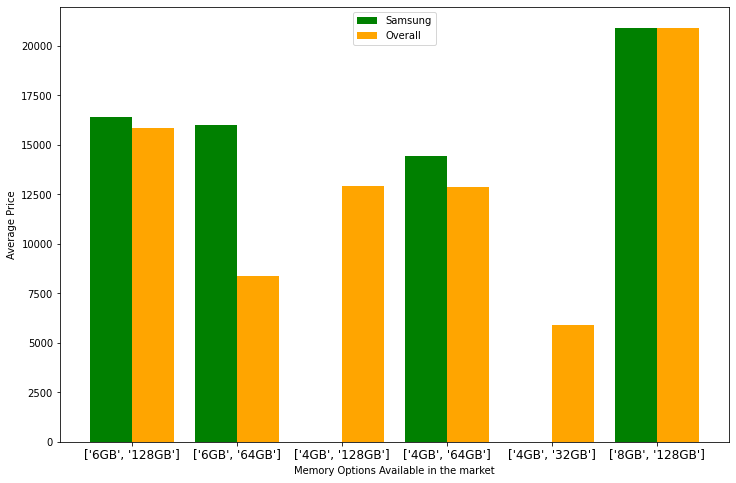

In [46]:
x = np.arange(len(SamSung))
print(SamSung)
y1 = SamSung
y2 = value_storer_ovr
width = 0.40

# plot data in grouped manner of bar type
fig=plt.figure(figsize=(12,8))
plt.bar(x-0.2, y1, width,color="Green")
plt.bar(x+0.2, y2, width,color="orange")
plt.xticks(x, Mem_Storer, color='black', fontsize='12', horizontalalignment='center')
plt.legend(["Samsung", "Overall"], loc ="upper center")
plt.xlabel("Memory Options Available in the market")
plt.ylabel("Average Price")

#### Throught this graph, we understand that Samsung provides a good price, if one wants to buy a smartphone having specifications of 8GB RAM and 128GB Internal Memory or 6GB RAM and 128GB Internal Memory. The price Range for 6GB and 64GB Internal Memory is very high as compared to the other brands. Samsung doesn't provide phones with 4GB+64GB or 4Gb+32GB memory, which the company needs to work on. 

### Though we can do more with the analysis of the data, We need to look into the anamolies of the dataset

In [41]:
# Lets consider OnePlus brand, which exclusively sells its phones on Amazon

df_Norm[df_Norm["Brands"]=="ONEPLUS"]

,Device Name,Brands,Color,Price (INR),RAM_Memory,Internal_Memory
41,OnePlus Nord CE 5G,ONEPLUS,Charcoal Ink,4499,8GB,128GB
44,OnePlus Nord CE 5G,ONEPLUS,Charcoal Ink,24999,8GB,128GB
63,OnePlus Nord 2 5G,ONEPLUS,Blue Haze,29999,8GB,128GB
84,OnePlus Nord 2 5G,ONEPLUS,Gray Sierra,29999,8GB,128GB
100,OnePlus Nord CE 5G,ONEPLUS,Charcoal Ink,24999,8GB,128GB
117,OnePlus Nord 2 5G,ONEPLUS,Gray Sierra,799,8GB,128GB
145,OnePlus 8T 5G,ONEPLUS,Lunar Silver,29999,8GB,128GB
193,OnePlus 9R 5G,ONEPLUS,Lake Blue,15989,8GB,128GB
203,OnePlus Nord 2 5G,ONEPLUS,Gray Sierra,46039,12GB,256GB


#### We can see that, this dataset only includes some OnePlus Phones, and the price too is erroneous. Hence, the scaping algorithm needs to be changed or modified. Also, at places, the specifications are not normalized, and more columns like battery life, camera, display quality, release year, etc. need to be added for any comprehensive analysis.

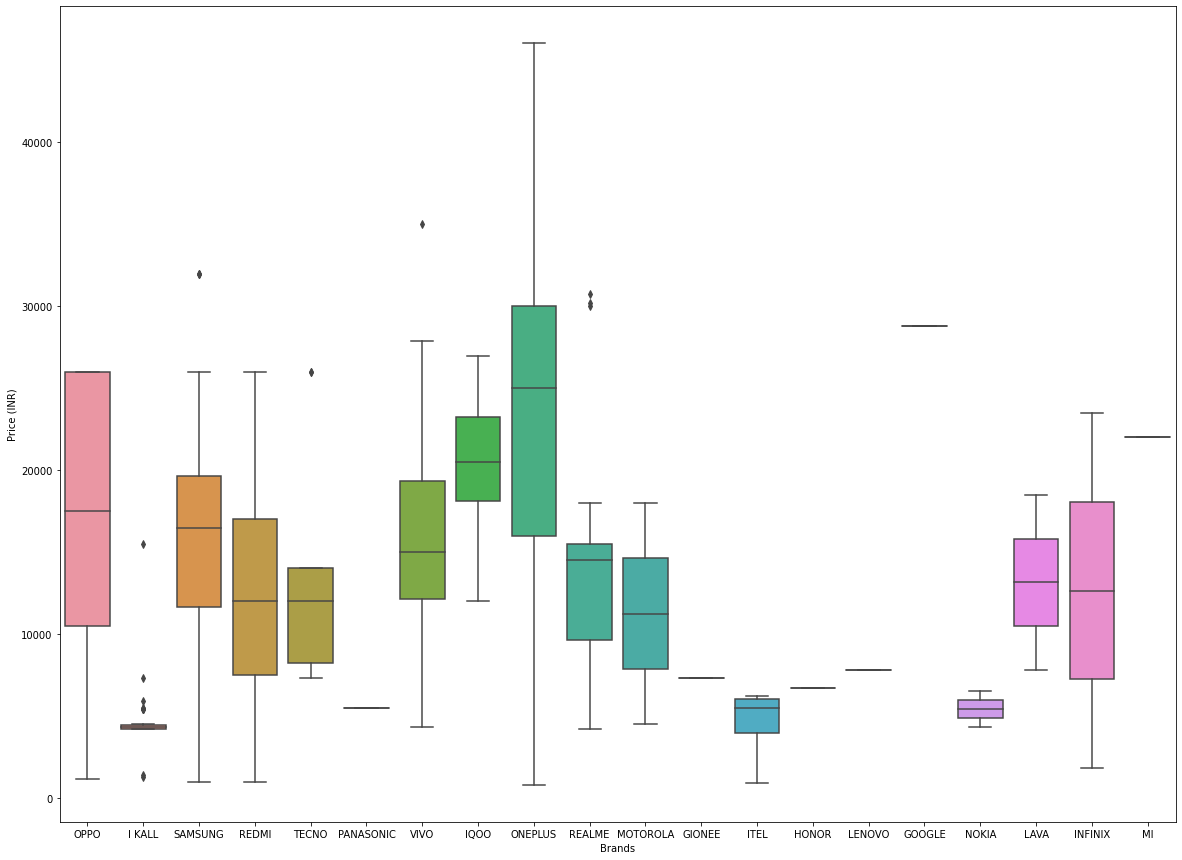

In [90]:
# Consider re-drawing Boxplots for comparing the brands
import seaborn as sns
plt.figure(figsize=(20,15))
sns.boxplot(y=df["Price (INR)"].astype(float), x=df['Brands'])

###### This dataset is prone to errors and hence, not all information can be considered correct. We know that Samsung is a premier company and has an average phone cost of around 20K-25K. but, the data here shows a different picture all together.  Most of the phones sold by OnePlus are atleast greater than 25K, but further we will see that during scraping, the data collected was incorrect and hence the lowest values came down as , nearing 0. The phones of brands IQOO builds and sells phones having prices less than 20K, but here the median price is around 22K. All this can lead us to see a different picture than all together. The small Boxplots for many brands show that the data provided is either insufficient or highly prone to errors.

#### If one needs to really compare phones, he or she can scrape websites like GRMArena, as they have complete details of each phones with detailed specifications